In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

# EDA Code

In [35]:
labels = ["YEAR", 'GUNLAW', "GRASS","HOMOSEX","INCOME", "POLVIEWS", 'NATRACE', 'NATENVIR', 'NATARMS', 'NATFARE', 'NATSOC', "AGE"]

In [36]:
# All columns related to moral questions
alanLoc = "GSS7218_R3.sav"

moral = pd.read_spss(alanLoc, usecols=labels, 
                     convert_categoricals=True)

In [37]:
# Transform str to int
moral["YEAR"] = np.array(moral["YEAR"]).astype(int)

In [38]:
# Limit years to later than 2000
moral = moral[moral['YEAR'] >=2000]
moral

,YEAR,AGE,INCOME,POLVIEWS,NATENVIR,NATRACE,NATARMS,NATFARE,NATSOC,GUNLAW,GRASS,HOMOSEX
38116,2000,26,NaN,SLGHTLY CONSERVATIVE,TOO LITTLE,NaN,TOO MUCH,TOO MUCH,TOO LITTLE,OPPOSE,NaN,NOT WRONG AT ALL
38117,2000,48,$8000 TO 9999,CONSERVATIVE,NaN,NaN,NaN,NaN,TOO LITTLE,FAVOR,NOT LEGAL,NaN
38118,2000,67,$15000 - 19999,CONSERVATIVE,TOO LITTLE,ABOUT RIGHT,TOO LITTLE,ABOUT RIGHT,ABOUT RIGHT,NaN,NOT LEGAL,NaN
38119,2000,39,$25000 OR MORE,SLGHTLY CONSERVATIVE,TOO LITTLE,ABOUT RIGHT,TOO MUCH,TOO MUCH,TOO LITTLE,NaN,LEGAL,NaN
38120,2000,25,$25000 OR MORE,SLIGHTLY LIBERAL,NaN,NaN,NaN,NaN,ABOUT RIGHT,NaN,NOT LEGAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,37,NaN,MODERATE,TOO LITTLE,TOO LITTLE,ABOUT RIGHT,TOO LITTLE,ABOUT RIGHT,OPPOSE,NaN,NOT WRONG AT ALL
64810,2018,75,$25000 OR MORE,SLGHTLY CONSERVATIVE,ABOUT RIGHT,ABOUT RIGHT,ABOUT RIGHT,ABOUT RIGHT,TOO LITTLE,OPPOSE,NaN,NaN
64811,2018,67,$25000 OR MORE,MODERATE,NaN,NaN,NaN,NaN,ABOUT RIGHT,FAVOR,LEGAL,NOT WRONG AT ALL
64812,2018,72,$25000 OR MORE,CONSERVATIVE,ABOUT RIGHT,ABOUT RIGHT,TOO LITTLE,TOO MUCH,TOO LITTLE,NaN,NOT LEGAL,NaN


# Response Types and Cleaning

The responses that respondents have replied with are shown here for each question:

In [6]:
moral['POLVIEWS'].value_counts()

MODERATE                8831
CONSERVATIVE            3601
SLGHTLY CONSERVATIVE    3231
LIBERAL                 2770
SLIGHTLY LIBERAL        2604
EXTREMELY LIBERAL        917
EXTRMLY CONSERVATIVE     895
Name: POLVIEWS, dtype: int64

In [7]:
moral['GUNLAW'].value_counts()

FAVOR     11090
OPPOSE     3470
Name: GUNLAW, dtype: int64

In [8]:
moral['GRASS'].value_counts()

NOT LEGAL    7379
LEGAL        6486
Name: GRASS, dtype: int64

In [9]:
moral['HOMOSEX'].value_counts()

ALWAYS WRONG        6679
NOT WRONG AT ALL    5826
SOMETIMES WRONG      972
ALMST ALWAYS WRG     563
OTHER                  0
Name: HOMOSEX, dtype: int64

# Analysis of NaN

Based on design of survey (unofficial source here: https://gss.norc.org/Lists/gssFAQs/DispForm.aspx?ID=9), not every single question is asked of all respondents. Therefore, there are a high number of NaN values in the data, mostly as a result of randomized survey design.

These NaNs are MCARs (missing completely at random). Therefore, though the number of individuals that have answered each pair of questions sometimes dwindles as low as ~6000 for each pair of ethical issues, their response overlap is representative of the intersectionality of the population.

In [10]:
gun_grass = moral[['GUNLAW', 'HOMOSEX']].dropna()
gun_grass

,GUNLAW,HOMOSEX
38116,OPPOSE,NOT WRONG AT ALL
38122,OPPOSE,ALWAYS WRONG
38123,FAVOR,NOT WRONG AT ALL
38127,FAVOR,NOT WRONG AT ALL
38128,FAVOR,ALWAYS WRONG
...,...,...
64805,FAVOR,NOT WRONG AT ALL
64807,OPPOSE,ALWAYS WRONG
64808,FAVOR,SOMETIMES WRONG
64809,OPPOSE,NOT WRONG AT ALL


# Political View and Opinion on Homosexual Sex Relations

In [11]:
hom_data = moral[['POLVIEWS', 'HOMOSEX']].dropna()
hom_data

,POLVIEWS,HOMOSEX
38116,SLGHTLY CONSERVATIVE,NOT WRONG AT ALL
38122,MODERATE,ALWAYS WRONG
38123,LIBERAL,NOT WRONG AT ALL
38127,CONSERVATIVE,NOT WRONG AT ALL
38128,MODERATE,ALWAYS WRONG
...,...,...
64804,MODERATE,ALWAYS WRONG
64805,MODERATE,NOT WRONG AT ALL
64808,MODERATE,SOMETIMES WRONG
64809,MODERATE,NOT WRONG AT ALL


In [12]:
# Map answers to numerical scales

hom_data["HOMOSEX"] = hom_data["HOMOSEX"].map({"ALWAYS WRONG":4,
                                              "NOT WRONG AT ALL": 1,
                                              "SOMETIMES WRONG": 2,
                                              "ALMST ALWAYS WRG": 3}) # scale of 1-4, 1 being most liberal, 4 being most conservative
hom_data["POLVIEWS"] = hom_data["POLVIEWS"].map({"EXTRMLY CONSERVATIVE": 7,
                                                "CONSERVATIVE": 6,
                                                "SLGHTLY CONSERVATIVE": 5,
                                                "MODERATE": 4,
                                                "SLIGHTLY LIBERAL": 3,
                                                "LIBERAL": 2,
                                                "EXTREMELY LIBERAL":1}) # scale of 1-7, 1 being most liberal, 7 being most conservative
hom_data

,POLVIEWS,HOMOSEX
38116,5,1.0
38122,4,4.0
38123,2,1.0
38127,6,1.0
38128,4,4.0
...,...,...
64804,4,4.0
64805,4,1.0
64808,4,2.0
64809,4,1.0


In [13]:
hom_arr = hom_data.groupby(['POLVIEWS', 'HOMOSEX']).size()
hom_arr

POLVIEWS  HOMOSEX
6         1.0         419
          2.0         106
          3.0          75
          4.0        1558
1         1.0         386
          2.0          36
          3.0          17
          4.0         113
7         1.0          83
          2.0          23
          3.0          18
          4.0         412
2         1.0        1114
          2.0         134
          3.0          42
          4.0         416
4         1.0        2203
          2.0         377
          3.0         230
          4.0        2385
5         1.0         659
          2.0         130
          3.0         102
          4.0         965
3         1.0         809
          2.0         143
          3.0          62
          4.0         505
dtype: int64

In [14]:
hom_arr = hom_arr.to_numpy().reshape(7, 4)
order = [1, 3, 6, 4, 5, 0, 2] # the array is not ordered on POLVIEWS columns: need reordering
hom_arr = hom_arr.tolist()
hom_arr = [hom_arr[i] for i in order]
hom_arr

[[386, 36, 17, 113],
 [1114, 134, 42, 416],
 [809, 143, 62, 505],
 [2203, 377, 230, 2385],
 [659, 130, 102, 965],
 [419, 106, 75, 1558],
 [83, 23, 18, 412]]

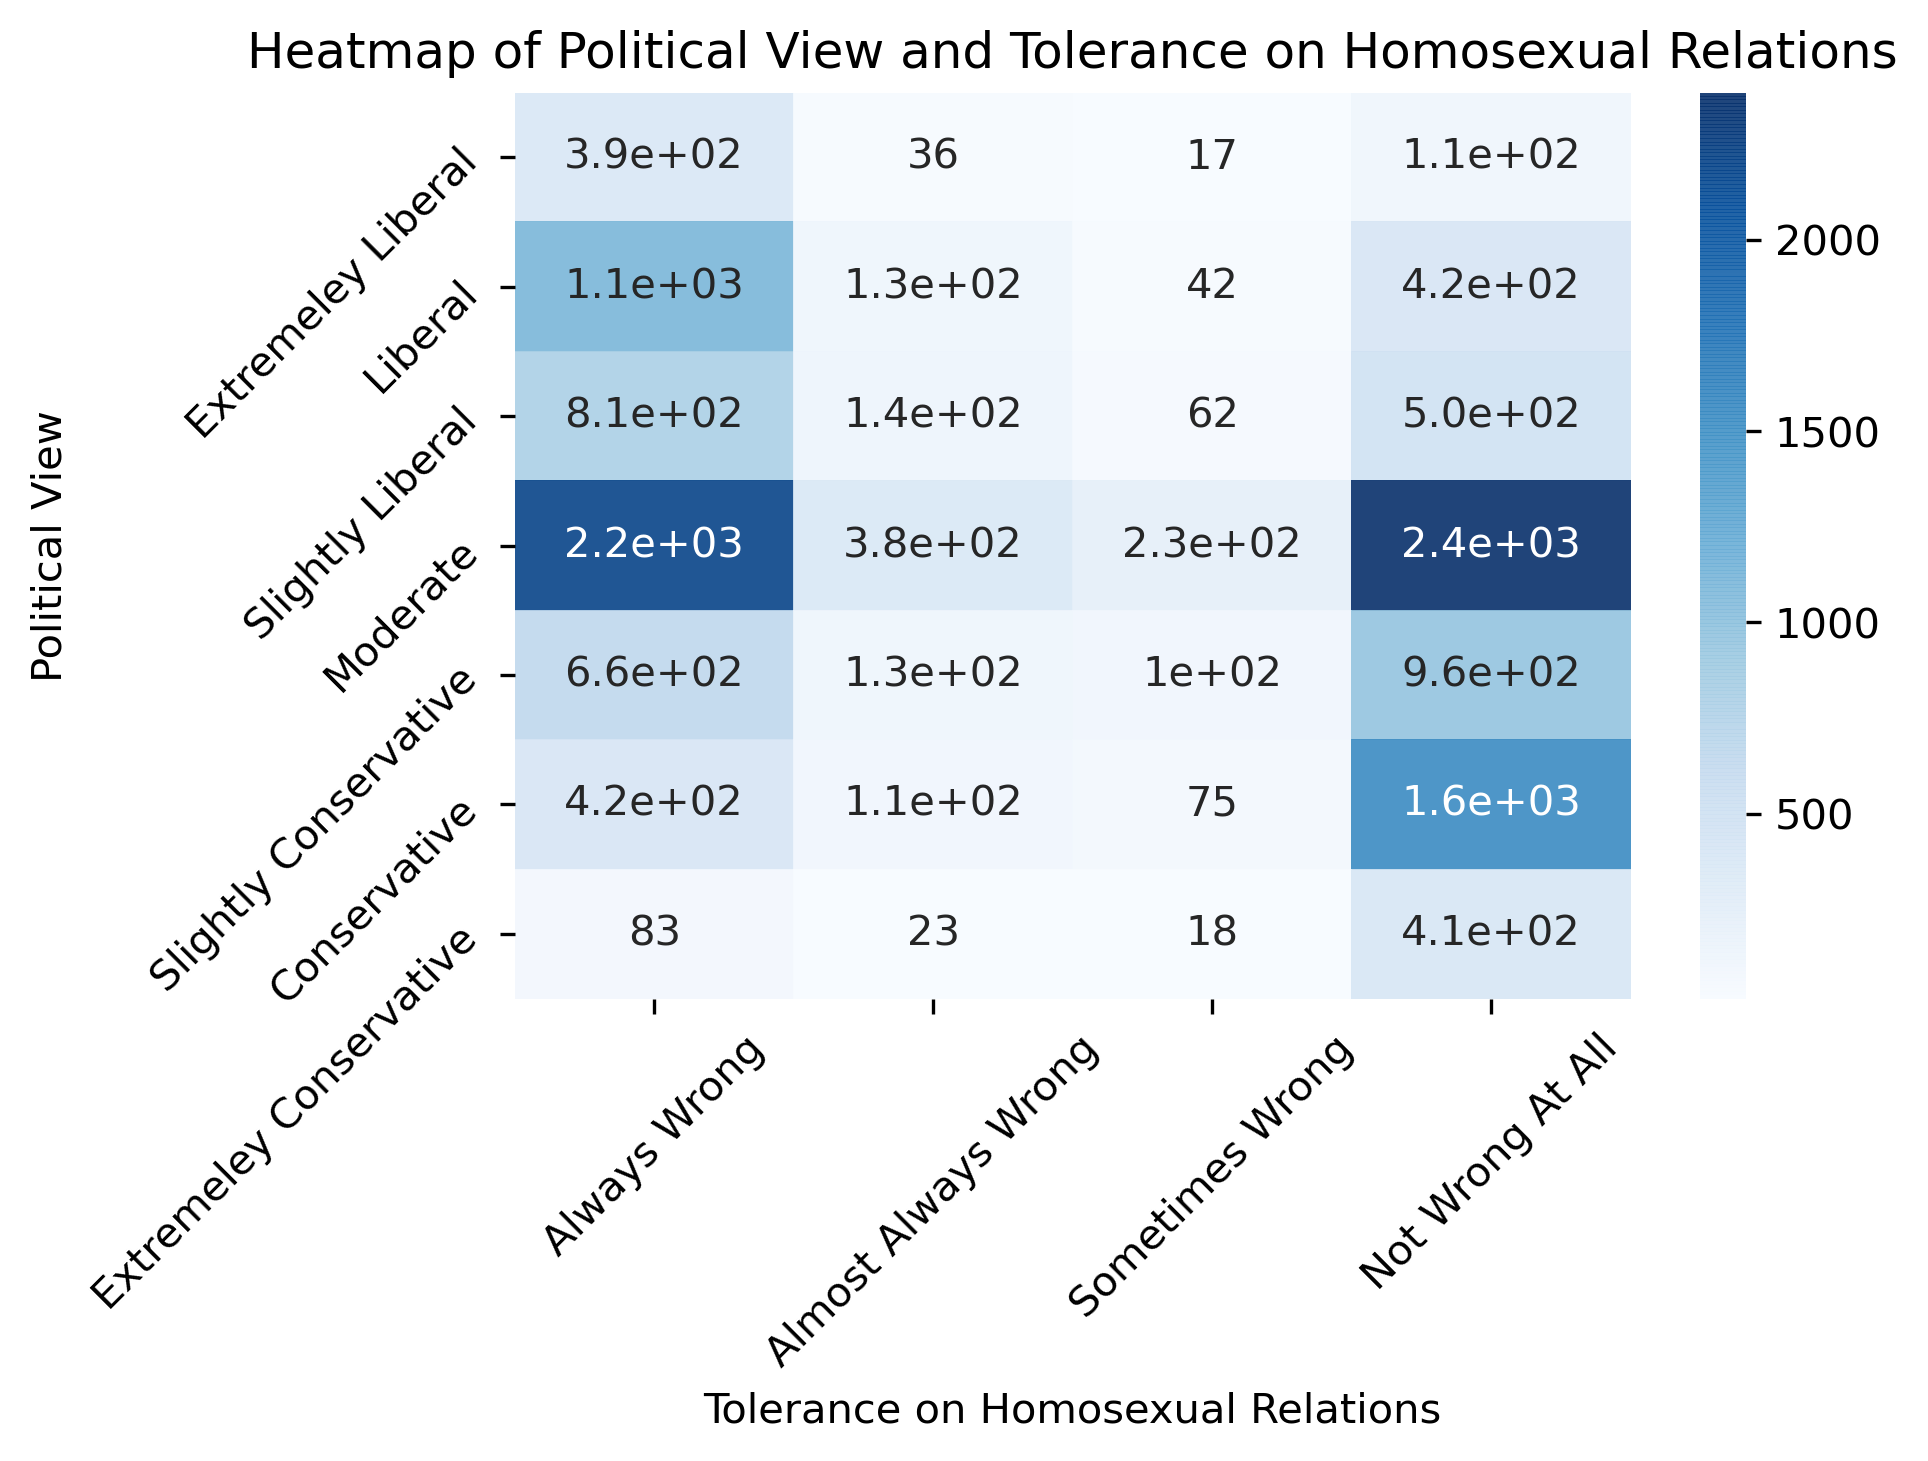

In [15]:
plt.figure(dpi=300)
sns.heatmap(data=hom_arr, annot = True, cmap='Blues', alpha=0.9)
plt.title("Heatmap of Political View and Tolerance on Homosexual Relations")
plt.xlabel("Tolerance on Homosexual Relations")
plt.ylabel("Political View");
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Always Wrong', 'Almost Always Wrong', "Sometimes Wrong", "Not Wrong At All"], rotation = 45)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.rcParams["font.family"] = "times new roman"

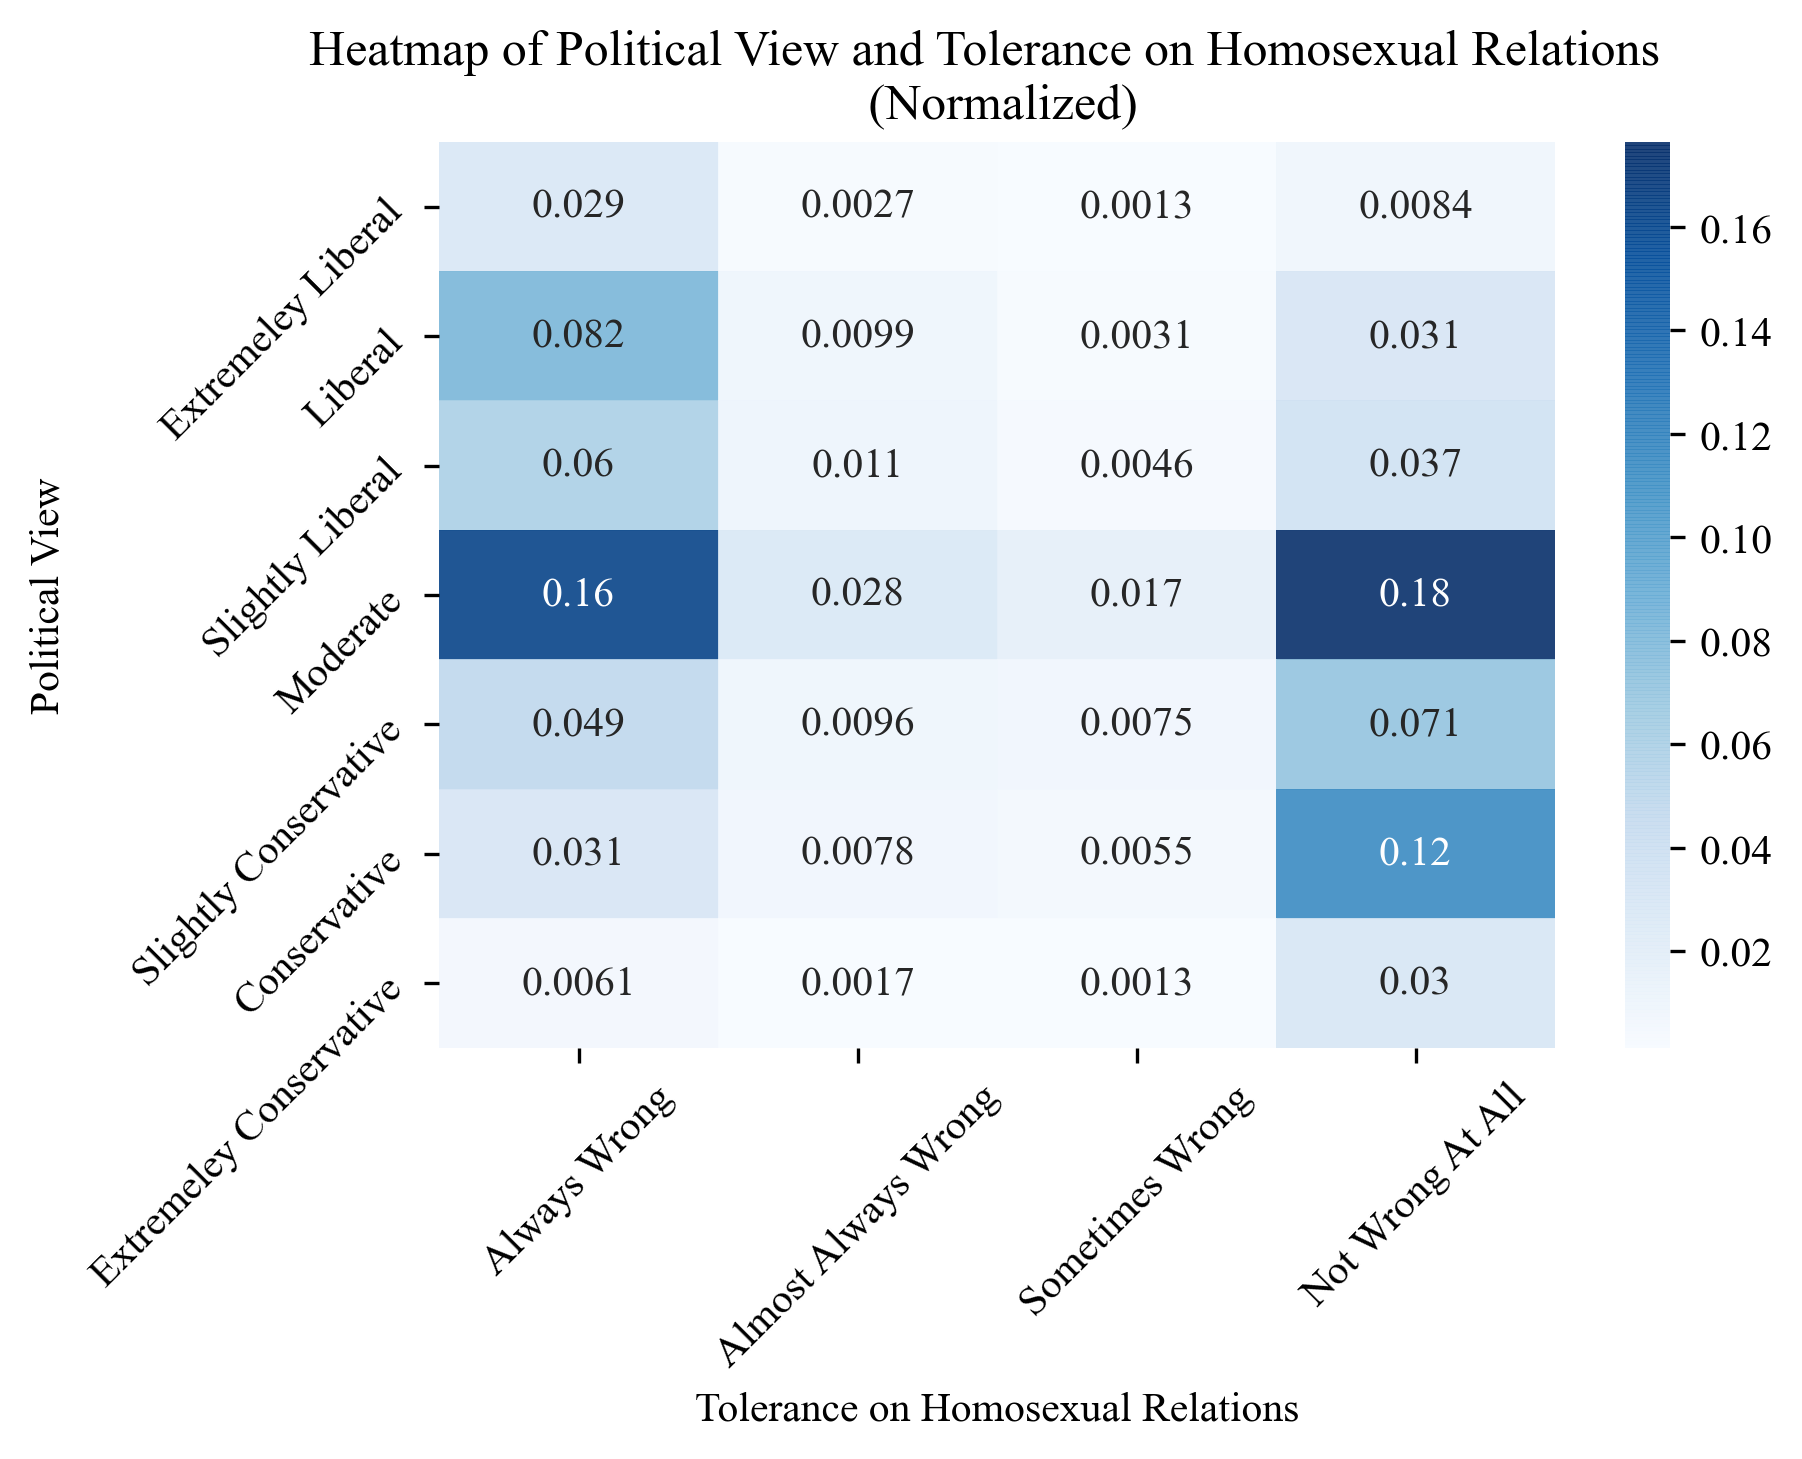

In [16]:
plt.figure(dpi=300)
sns.heatmap(hom_arr / np.sum(hom_arr), annot=True, cmap='Blues', alpha=0.9)
plt.title("Heatmap of Political View and Tolerance on Homosexual Relations  \n (Normalized)")
plt.xlabel("Tolerance on Homosexual Relations")
plt.ylabel("Political View")
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Always Wrong', 'Almost Always Wrong', "Sometimes Wrong", "Not Wrong At All"], rotation = 45)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
#plt.savefig("test.png")

# Political View and Opinion on Marijuana Legalization

In [17]:
mar_data = moral[['POLVIEWS', 'GRASS']].dropna()
mar_data.value_counts()

POLVIEWS              GRASS    
MODERATE              NOT LEGAL    2647
                      LEGAL        2393
CONSERVATIVE          NOT LEGAL    1516
SLGHTLY CONSERVATIVE  NOT LEGAL    1108
LIBERAL               LEGAL        1065
SLIGHTLY LIBERAL      LEGAL         861
SLGHTLY CONSERVATIVE  LEGAL         789
SLIGHTLY LIBERAL      NOT LEGAL     650
CONSERVATIVE          LEGAL         625
LIBERAL               NOT LEGAL     553
EXTREMELY LIBERAL     LEGAL         399
EXTRMLY CONSERVATIVE  NOT LEGAL     391
EXTREMELY LIBERAL     NOT LEGAL     162
EXTRMLY CONSERVATIVE  LEGAL         153
dtype: int64

In [18]:
# Map answers to numerical scales

mar_data["GRASS"] = mar_data["GRASS"].map({"NOT LEGAL": 0,
                                          "LEGAL": 1})
mar_data["POLVIEWS"] = mar_data["POLVIEWS"].map({"EXTRMLY CONSERVATIVE": 7,
                                                "CONSERVATIVE": 6,
                                                "SLGHTLY CONSERVATIVE": 5,
                                                "MODERATE": 4,
                                                "SLIGHTLY LIBERAL": 3,
                                                "LIBERAL": 2,
                                                "EXTREMELY LIBERAL":1}) # scale of 1-7, 1 being most liberal, 7 being most conservative
mar_data

,POLVIEWS,GRASS
38117,6,0
38118,6,0
38119,5,1
38120,3,0
38121,3,0
...,...,...
64804,4,1
64806,4,0
64808,4,1
64811,4,1


In [19]:
mar_arr = mar_data.groupby(["POLVIEWS", "GRASS"]).size()
mar_arr

POLVIEWS  GRASS
6         1         625
          0        1516
1         1         399
          0         162
7         1         153
          0         391
2         1        1065
          0         553
4         1        2393
          0        2647
5         1         789
          0        1108
3         1         861
          0         650
dtype: int64

In [20]:
mar_arr = mar_arr.to_numpy().reshape(7,2)
mar_arr = mar_arr.tolist()
mar_arr = [mar_arr[i] for i in order]
mar_arr

[[399, 162],
 [1065, 553],
 [861, 650],
 [2393, 2647],
 [789, 1108],
 [625, 1516],
 [153, 391]]

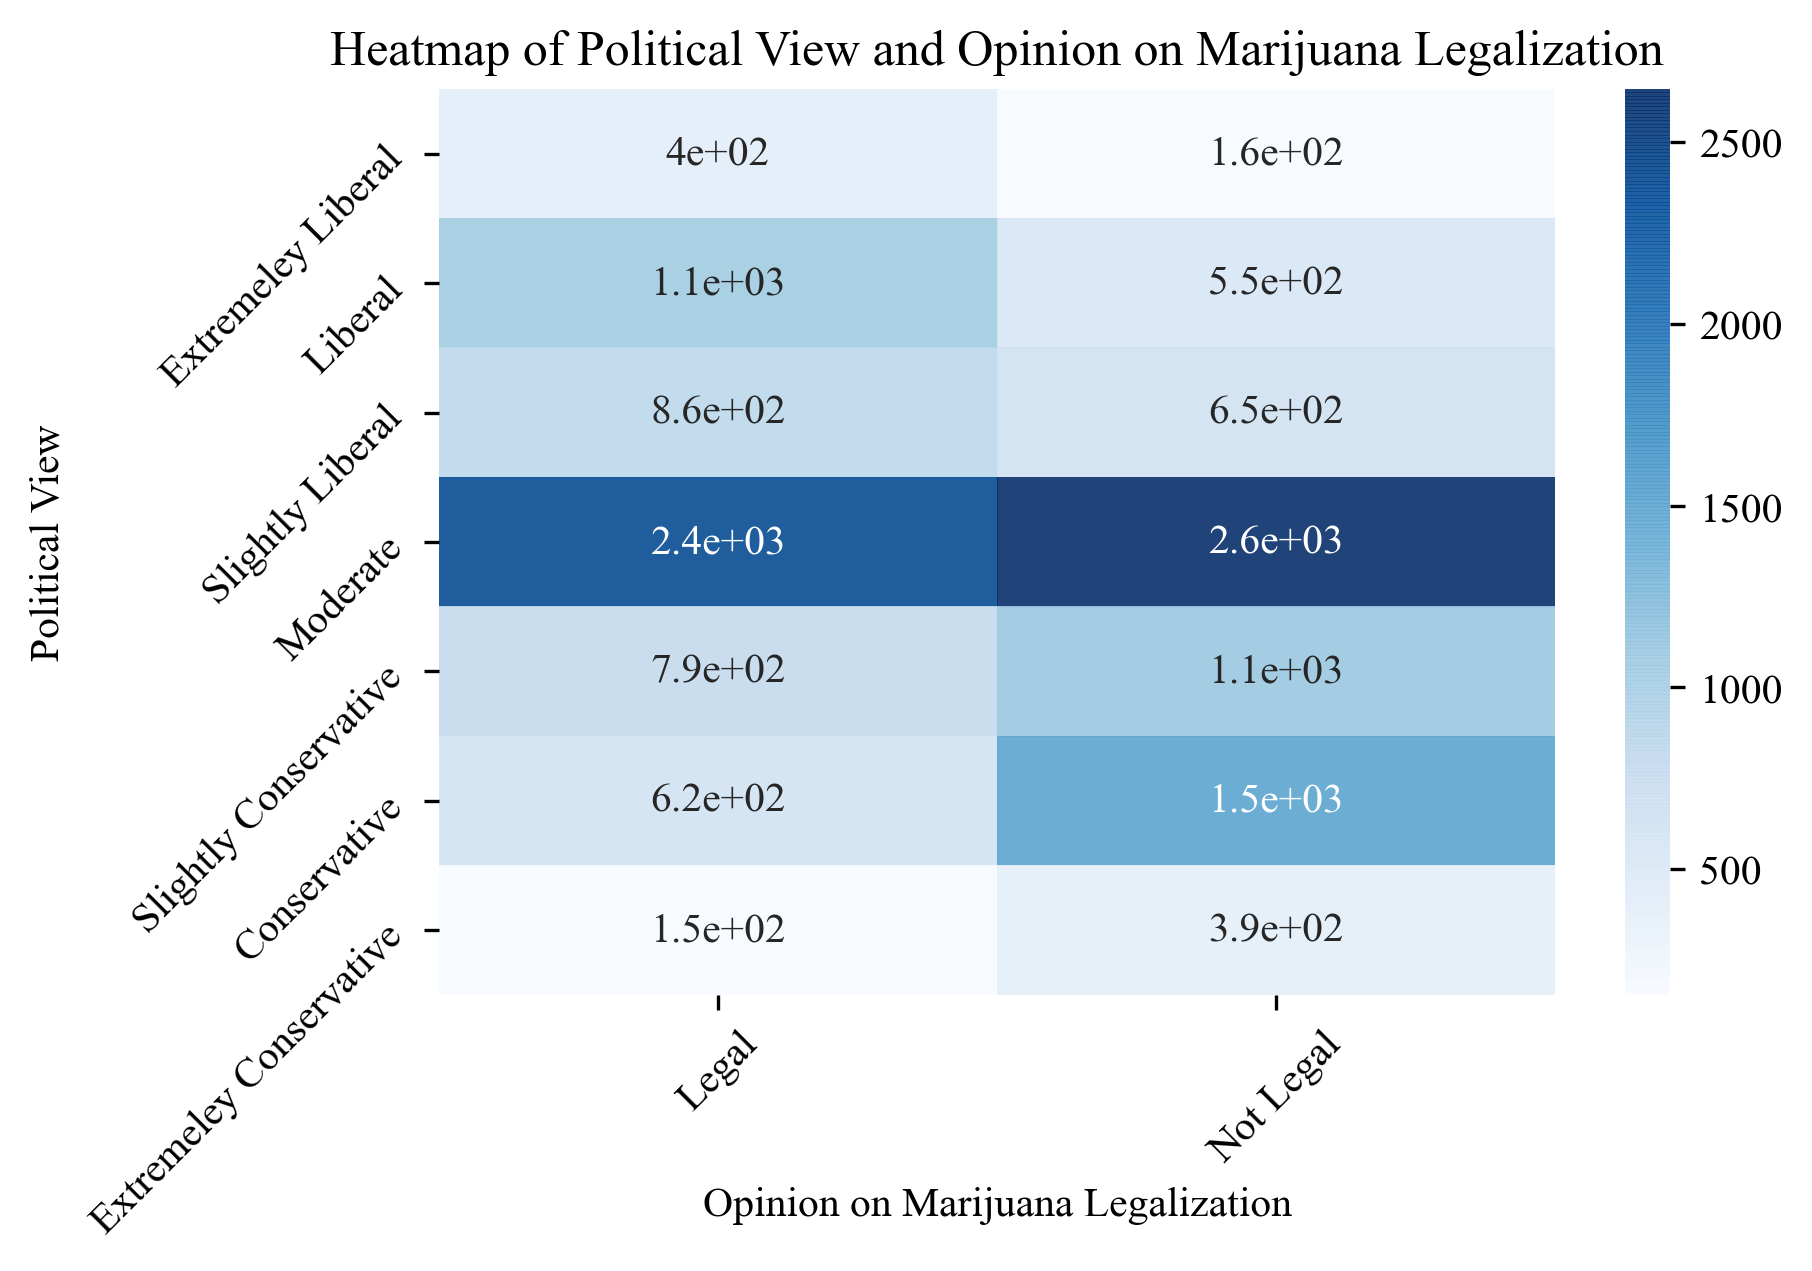

In [21]:
plt.figure(dpi=300)
sns.heatmap(data=mar_arr, annot = True, cmap='Blues', alpha=0.9)
plt.title("Heatmap of Political View and Opinion on Marijuana Legalization")
plt.xlabel("Opinion on Marijuana Legalization")
plt.ylabel("Political View");
plt.xticks([0.5, 1.5], ["Legal", "Not Legal"], rotation = 45)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.rcParams["font.family"] = "times new roman"

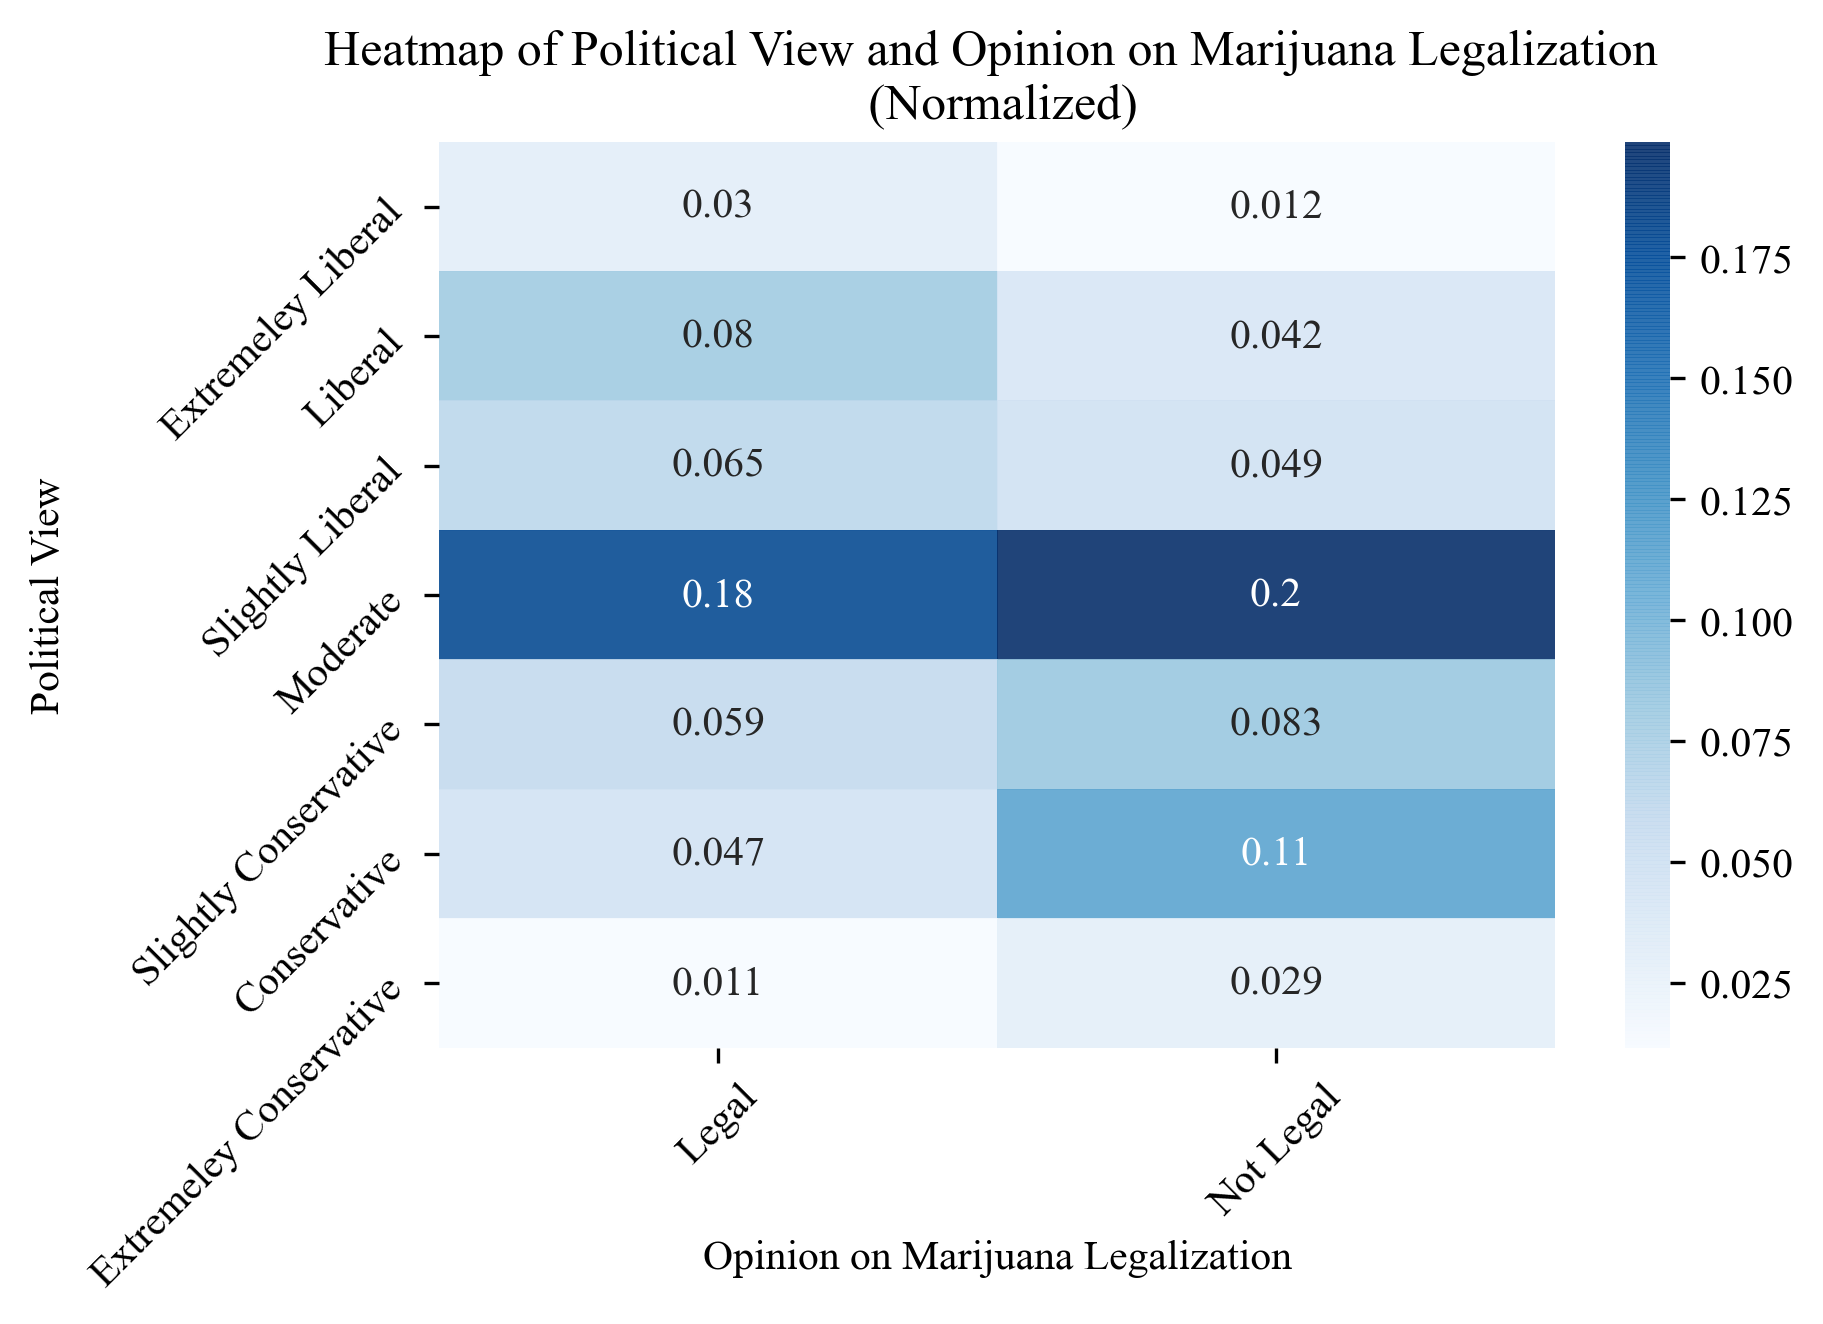

In [22]:
plt.figure(dpi=300)
sns.heatmap(data=mar_arr/np.sum(mar_arr), annot = True, cmap='Blues', alpha=0.9)
plt.title("Heatmap of Political View and Opinion on Marijuana Legalization \n (Normalized)")
plt.xlabel("Opinion on Marijuana Legalization")
plt.ylabel("Political View");
plt.xticks([0.5, 1.5], ["Legal", "Not Legal"], rotation = 45)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.rcParams["font.family"] = "times new roman"

# Political View and Opinion on Gun Law

In [23]:
gun_data = moral[['POLVIEWS', 'GUNLAW']].dropna() 
gun_data.groupby(["POLVIEWS", "GUNLAW"]).size()

POLVIEWS              GUNLAW
CONSERVATIVE          FAVOR     1438
                      OPPOSE     779
EXTREMELY LIBERAL     FAVOR      453
                      OPPOSE     104
EXTRMLY CONSERVATIVE  FAVOR      342
                      OPPOSE     204
LIBERAL               FAVOR     1479
                      OPPOSE     264
MODERATE              FAVOR     4229
                      OPPOSE    1210
SLGHTLY CONSERVATIVE  FAVOR     1431
                      OPPOSE     501
SLIGHTLY LIBERAL      FAVOR     1307
                      OPPOSE     277
dtype: int64

In [24]:
gun_data["GUNLAW"] = gun_data["GUNLAW"].map({"FAVOR": 1,
                                          "OPPOSE": 0}) # GUNLAW: Favor or oppose gun permit
gun_data["POLVIEWS"] = gun_data["POLVIEWS"].map({"EXTRMLY CONSERVATIVE": 7,
                                                "CONSERVATIVE": 6,
                                                "SLGHTLY CONSERVATIVE": 5,
                                                "MODERATE": 4,
                                                "SLIGHTLY LIBERAL": 3,
                                                "LIBERAL": 2,
                                                "EXTREMELY LIBERAL":1}) # scale of 1-7, 1 being most liberal, 7 being most conservative
gun_data

,POLVIEWS,GUNLAW
38116,5,0
38117,6,1
38121,3,1
38122,4,0
38123,2,1
...,...,...
64805,4,1
64808,4,1
64809,4,0
64810,5,0


In [25]:
gun_arr = gun_data.groupby(["POLVIEWS", "GUNLAW"]).size().to_numpy().reshape(7,2).tolist()
gun_arr = [gun_arr[i] for i in order]
gun_arr

[[453, 104],
 [1479, 264],
 [1307, 277],
 [4229, 1210],
 [1431, 501],
 [1438, 779],
 [342, 204]]

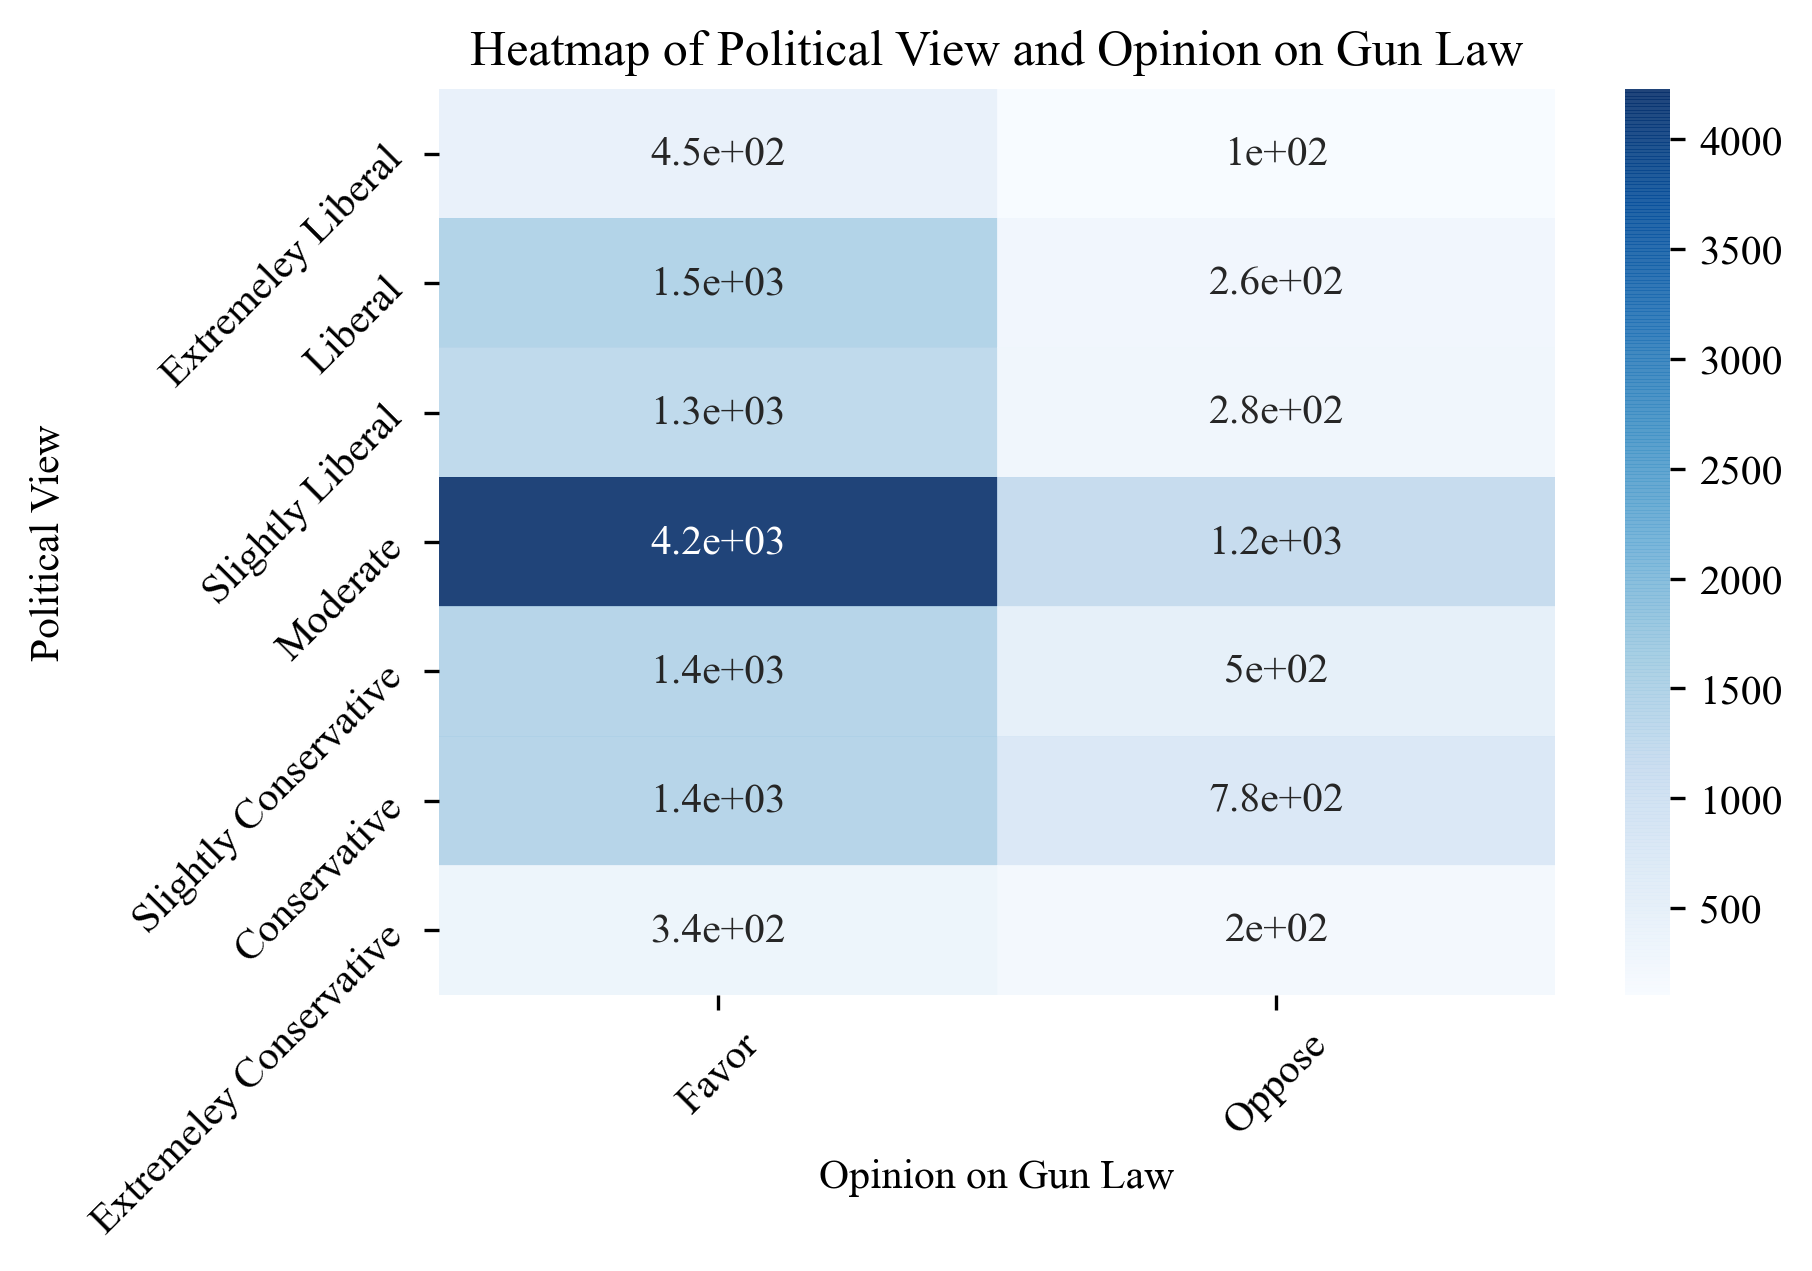

In [26]:
plt.figure(dpi=300)
sns.heatmap(data=gun_arr, annot = True, cmap='Blues', alpha=0.9)
plt.title("Heatmap of Political View and Opinion on Gun Law")
plt.xlabel("Opinion on Gun Law")
plt.ylabel("Political View");
plt.xticks([0.5, 1.5], ["Favor", "Oppose"], rotation = 45)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.rcParams["font.family"] = "times new roman"

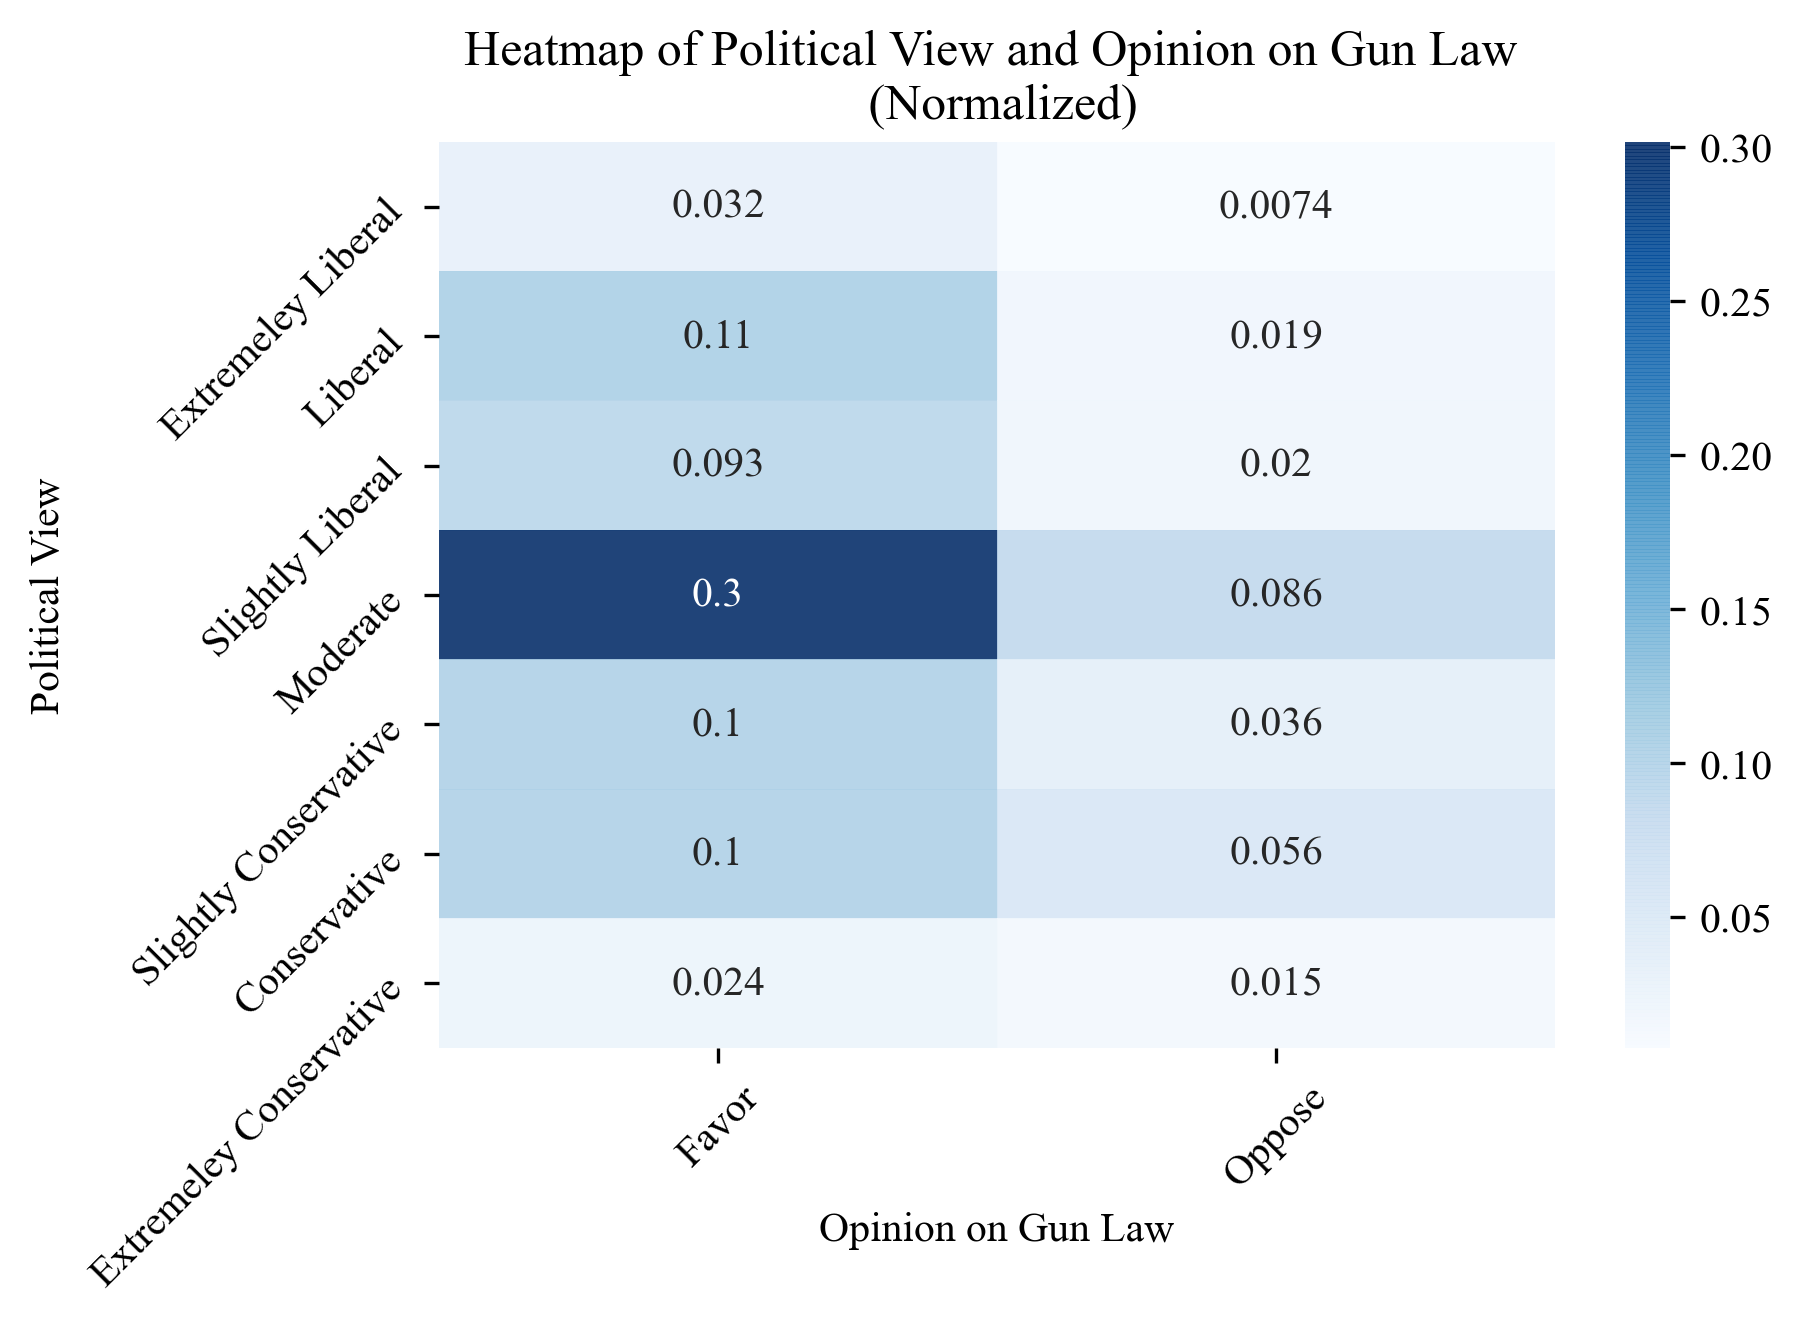

In [27]:
plt.figure(dpi=300)
sns.heatmap(data=gun_arr/np.sum(gun_arr), annot = True, cmap='Blues', alpha=0.9)
plt.title("Heatmap of Political View and Opinion on Gun Law \n (Normalized)")
plt.xlabel("Opinion on Gun Law")
plt.ylabel("Political View");
plt.xticks([0.5, 1.5], ["Favor", "Oppose"], rotation = 45)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.rcParams["font.family"] = "times new roman"

In [28]:
norm_mar_arr = mar_arr/np.sum(mar_arr)
norm_mar_arr
row_mar_arr = []
for i in norm_mar_arr:
    row_mar_arr.append(i[0]/np.sum(i))
row_mar_arr

[0.7112299465240642,
 0.6582200247218789,
 0.5698213103904699,
 0.4748015873015873,
 0.4159198734844492,
 0.29191966370854744,
 0.28125]

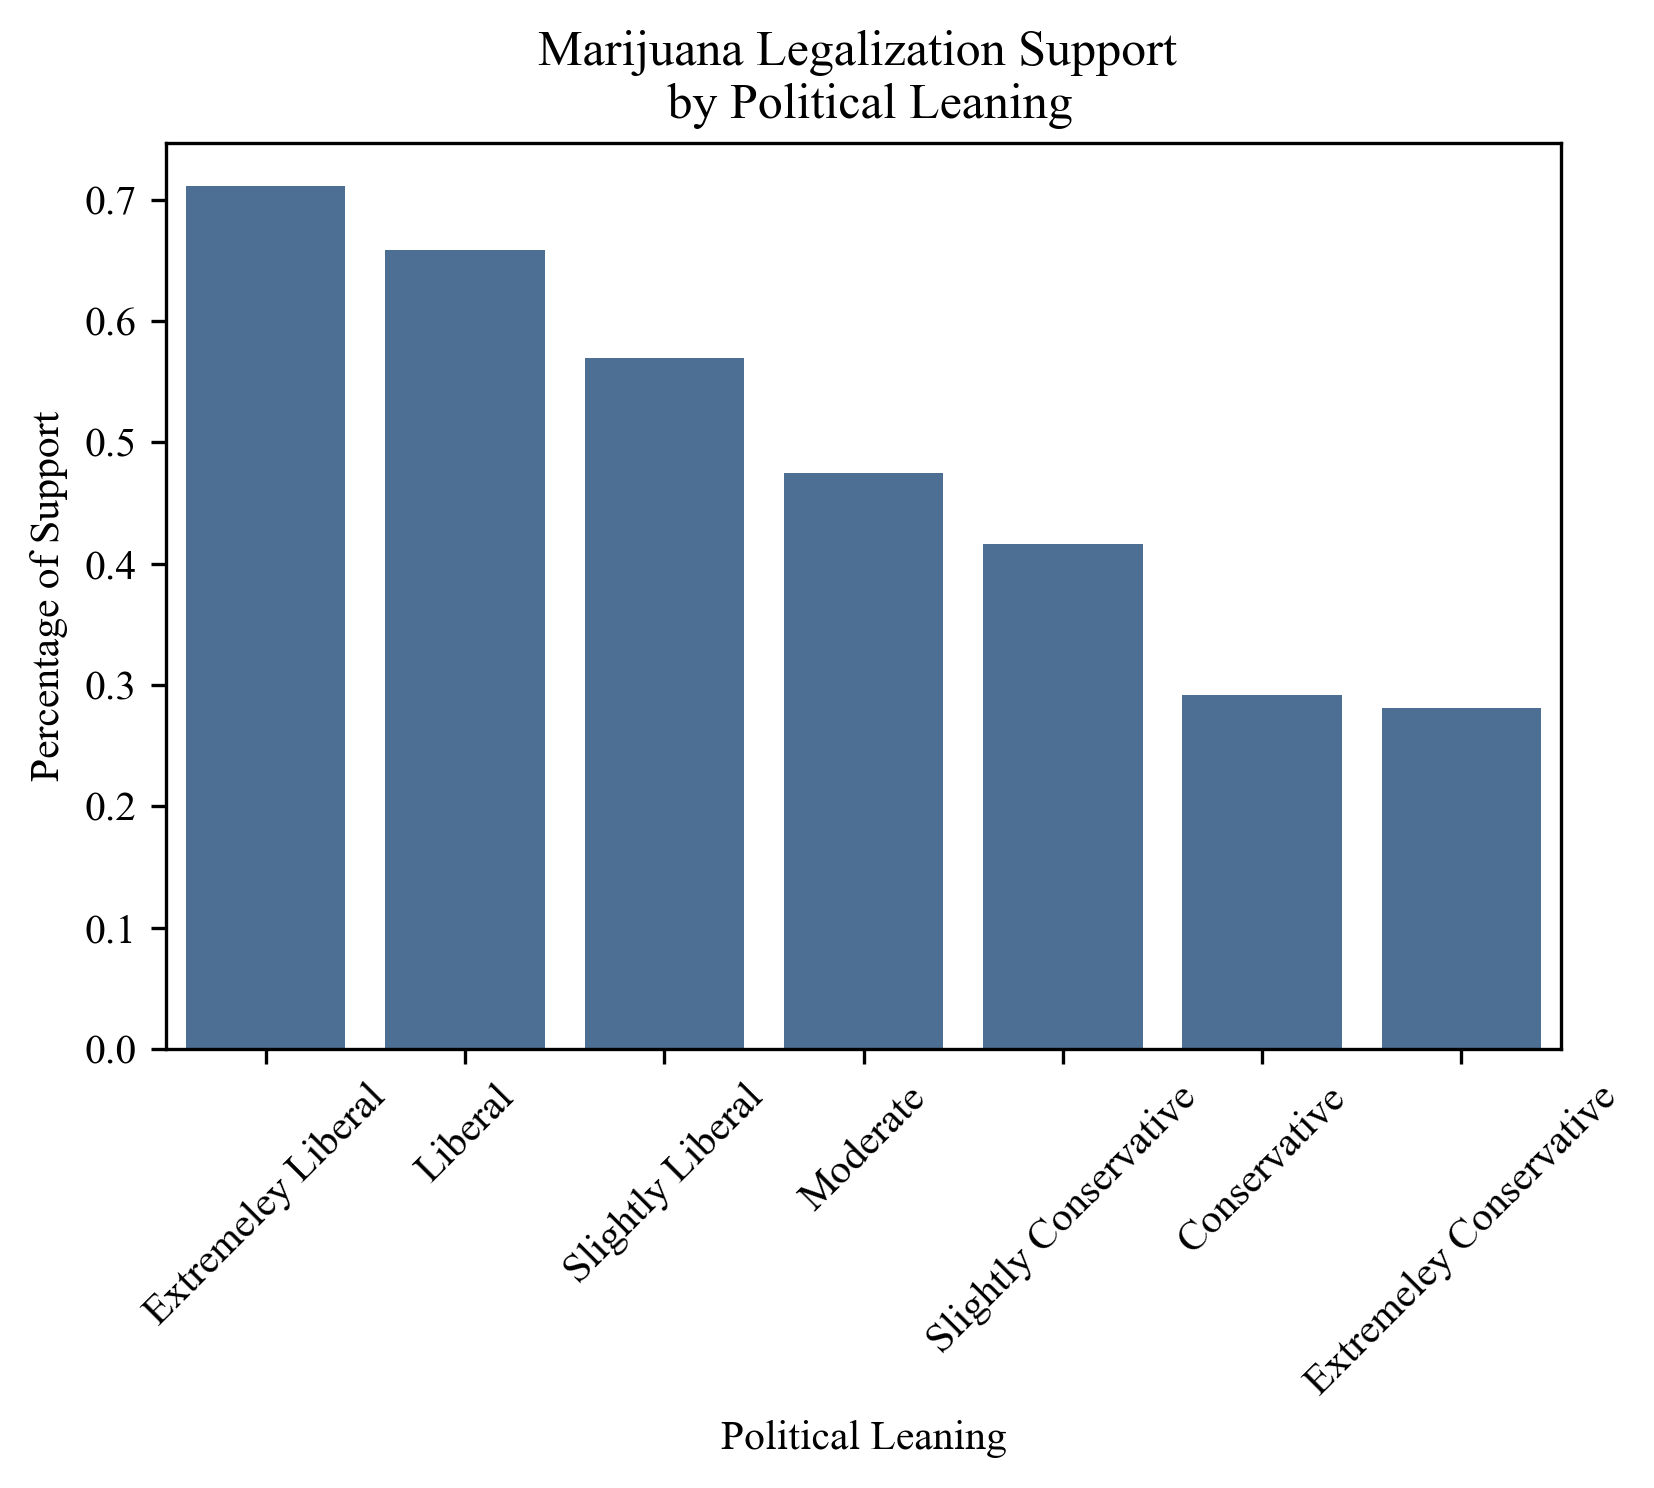

In [29]:
# percentage of individual who identify as some kind of political leaning that support marijuana legalization
plt.figure(dpi=300)
sns.barplot(x=['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], y=row_mar_arr, 
            color = "#426f9e")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.title("Marijuana Legalization Support \n by Political Leaning")
plt.xlabel("Political Leaning")
plt.ylabel("Percentage of Support");

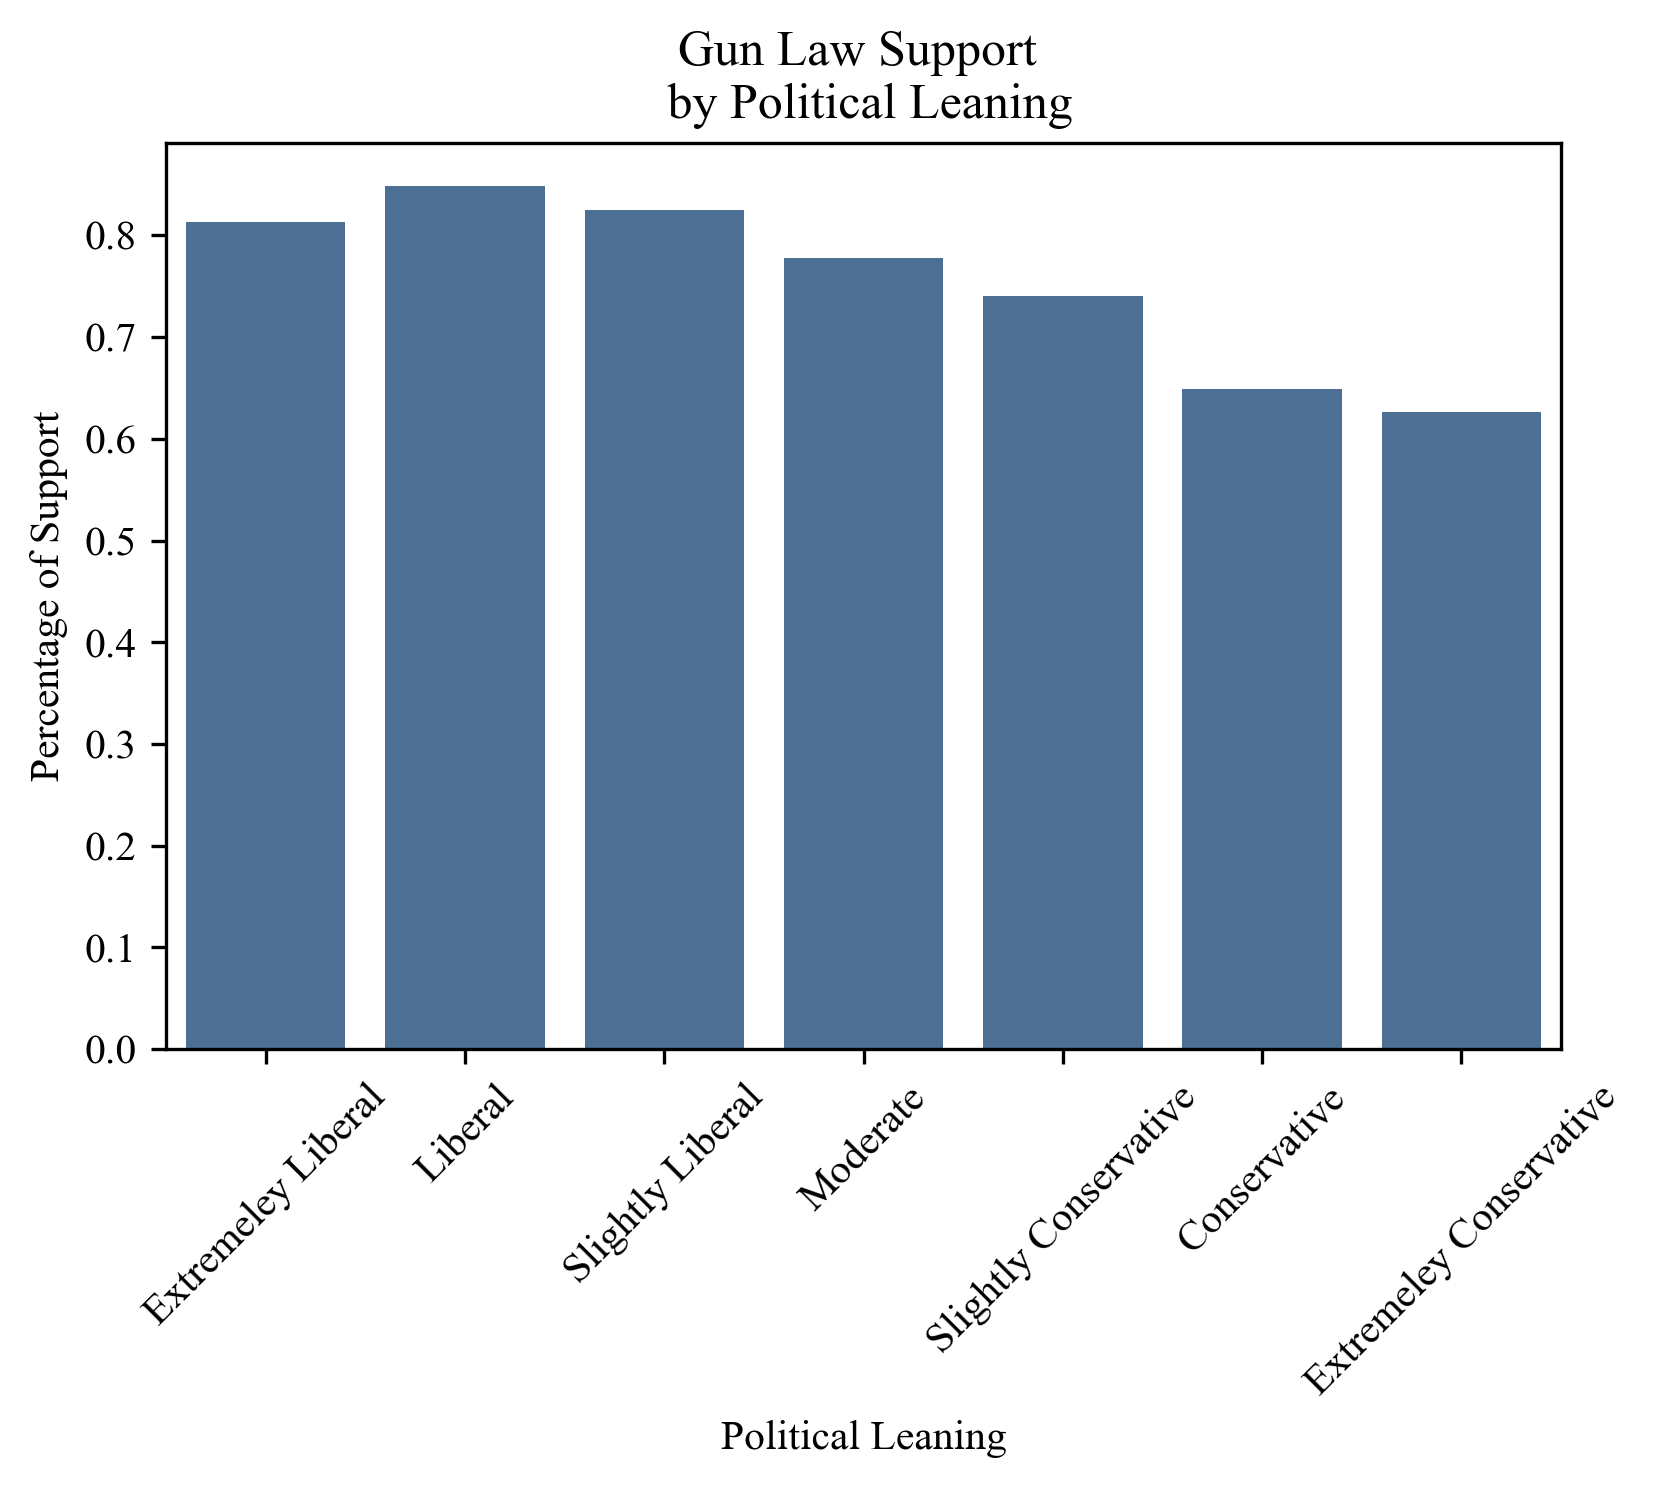

In [30]:
# percentage of individual who identify as some kind of political leaning that support gun permit law
norm_gun_arr = gun_arr/np.sum(gun_arr)
row_gun_arr = []
for i in norm_gun_arr:
    row_gun_arr.append(i[0]/np.sum(i))
plt.figure(dpi=300)
sns.barplot(x=['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], y=row_gun_arr, 
            color = "#426f9e")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.title("Gun Law Support \n by Political Leaning")
plt.xlabel("Political Leaning")
plt.ylabel("Percentage of Support");

In [31]:
# Find individuals who think homosexuality is wrong
binarized = moral.copy()
homosex = pd.get_dummies(moral[['HOMOSEX']])[['HOMOSEX_ALMST ALWAYS WRG', 
                                           'HOMOSEX_ALWAYS WRONG', 
                                           'HOMOSEX_SOMETIMES WRONG']]
homo_bool = np.sum(homosex, axis=1)

#Re-identify those who did not answer the question
homo_bool.iloc[moral['HOMOSEX'].isna().to_list()] = np.nan

binarized['HOMOSEX'] = homo_bool

hom_binarized_df = binarized[["POLVIEWS", "HOMOSEX"]].dropna()
hom_binarized_arr = hom_binarized_df.groupby(["POLVIEWS", "HOMOSEX"]).size().to_numpy().reshape(7,2)
hom_binarized_df.groupby(["POLVIEWS", "HOMOSEX"]).size()

POLVIEWS              HOMOSEX
CONSERVATIVE          0.0         419
                      1.0        1739
EXTREMELY LIBERAL     0.0         386
                      1.0         166
EXTRMLY CONSERVATIVE  0.0          83
                      1.0         453
LIBERAL               0.0        1114
                      1.0         592
MODERATE              0.0        2203
                      1.0        2992
SLGHTLY CONSERVATIVE  0.0         659
                      1.0        1197
SLIGHTLY LIBERAL      0.0         809
                      1.0         710
dtype: int64

In [32]:
hom_binarized_arr = hom_binarized_arr.tolist()
hom_binarized_arr = [hom_binarized_arr[i] for i in order]
hom_binarized_arr

[[386, 166],
 [1114, 592],
 [809, 710],
 [2203, 2992],
 [659, 1197],
 [419, 1739],
 [83, 453]]

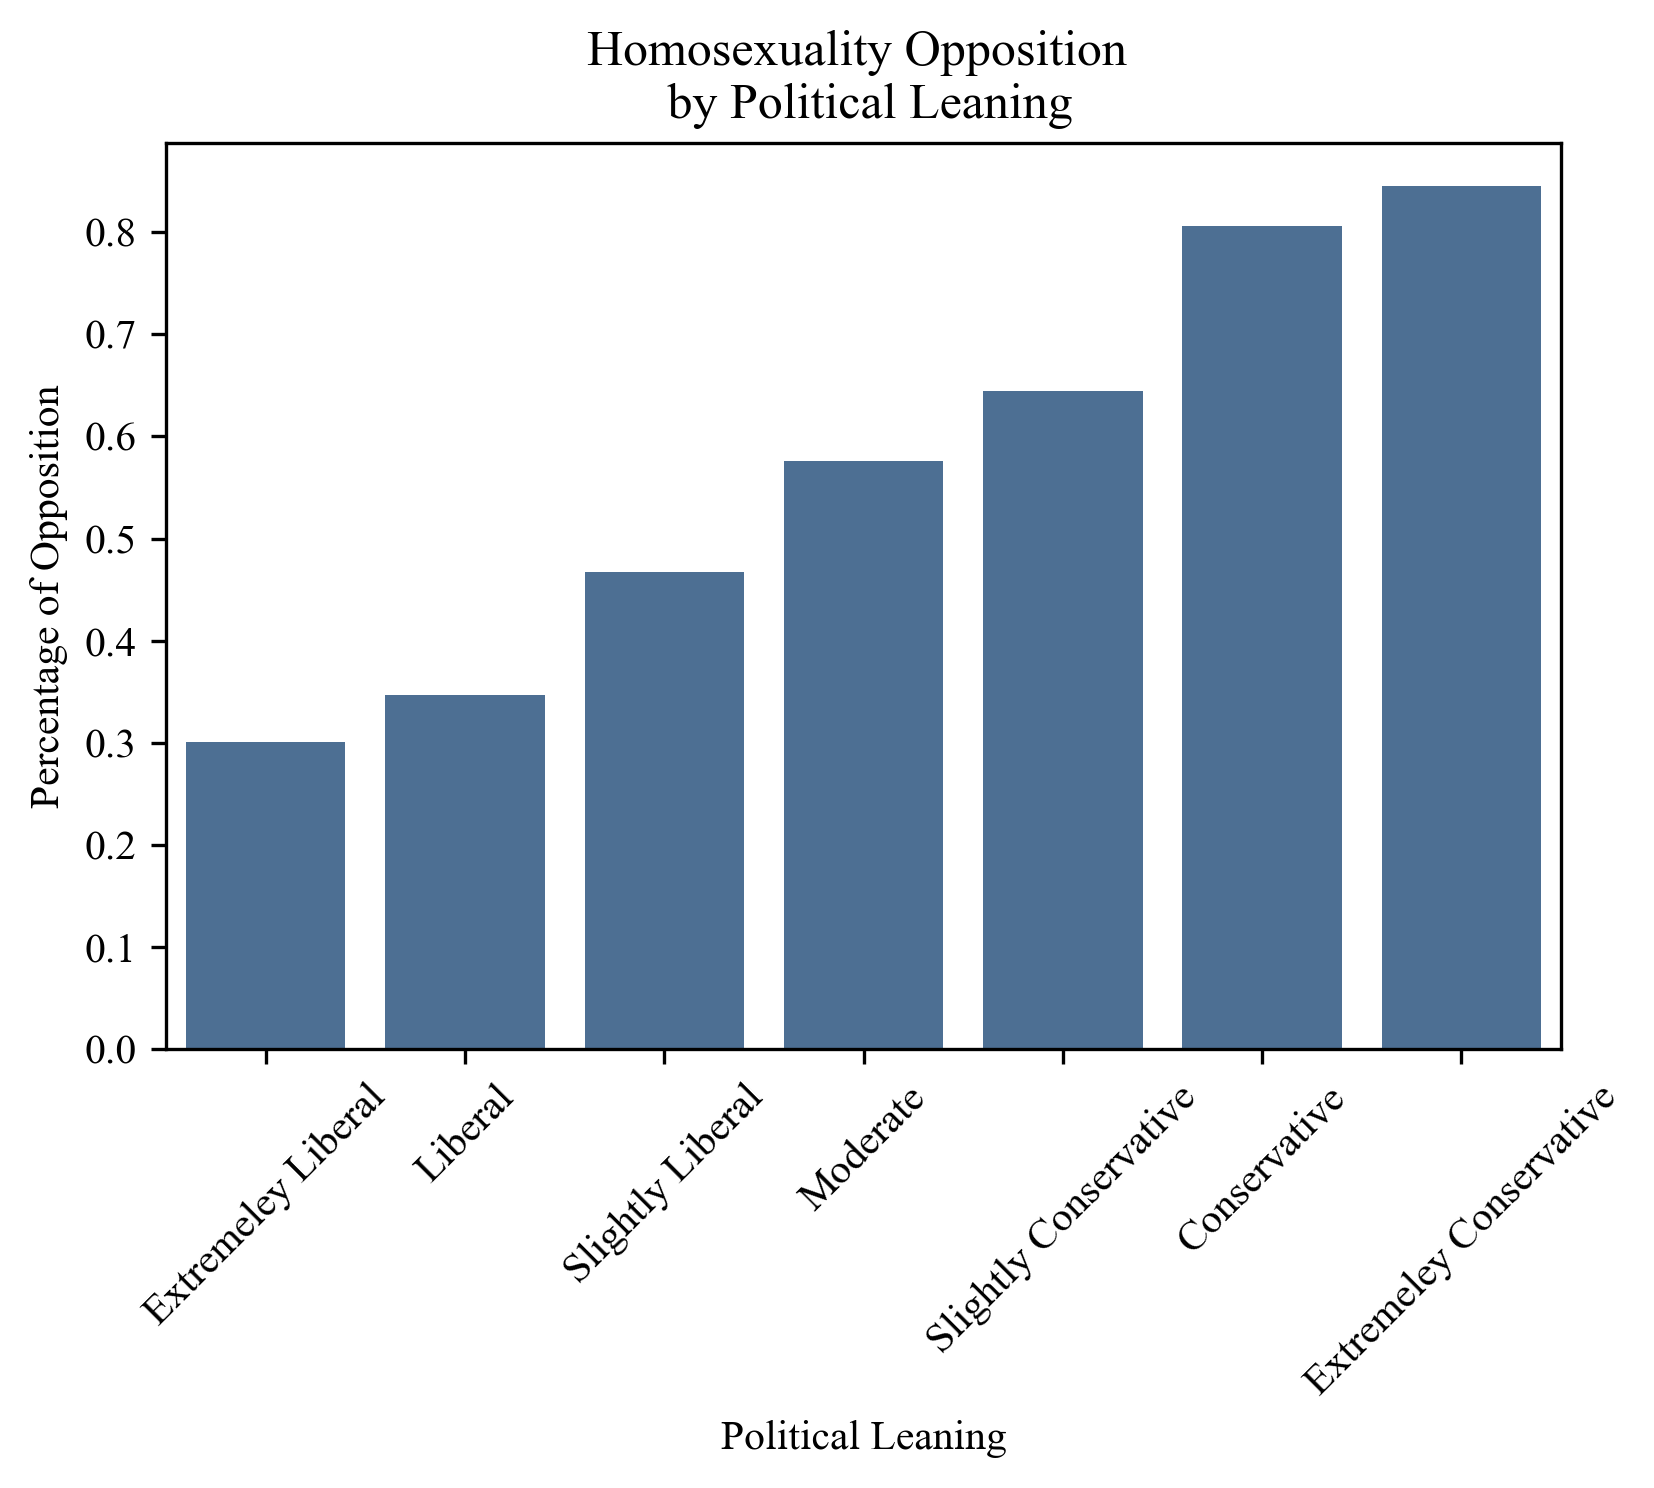

In [33]:
hom_binarized_norm = hom_binarized_arr/np.sum(hom_binarized_arr)
row_hom_arr = []
for i in hom_binarized_norm:
    row_hom_arr.append(i[1]/np.sum(i)) # reversed - 0/1 instead of 1/0 as in previous sections
# graph making    
plt.figure(dpi=300)
sns.barplot(x=['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], y=row_hom_arr, 
            color = "#426f9e")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Extremeley Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative',
                                                'Conservative', "Extremeley Conservative"], rotation = 45);
plt.title("Homosexuality Opposition \n by Political Leaning")
plt.xlabel("Political Leaning")
plt.ylabel("Percentage of Opposition");

In [34]:
moral

,YEAR,INCOME,POLVIEWS,NATENVIR,NATRACE,NATARMS,NATFARE,NATSOC,GUNLAW,GRASS,HOMOSEX
38116,2000,NaN,SLGHTLY CONSERVATIVE,TOO LITTLE,NaN,TOO MUCH,TOO MUCH,TOO LITTLE,OPPOSE,NaN,NOT WRONG AT ALL
38117,2000,$8000 TO 9999,CONSERVATIVE,NaN,NaN,NaN,NaN,TOO LITTLE,FAVOR,NOT LEGAL,NaN
38118,2000,$15000 - 19999,CONSERVATIVE,TOO LITTLE,ABOUT RIGHT,TOO LITTLE,ABOUT RIGHT,ABOUT RIGHT,NaN,NOT LEGAL,NaN
38119,2000,$25000 OR MORE,SLGHTLY CONSERVATIVE,TOO LITTLE,ABOUT RIGHT,TOO MUCH,TOO MUCH,TOO LITTLE,NaN,LEGAL,NaN
38120,2000,$25000 OR MORE,SLIGHTLY LIBERAL,NaN,NaN,NaN,NaN,ABOUT RIGHT,NaN,NOT LEGAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,NaN,MODERATE,TOO LITTLE,TOO LITTLE,ABOUT RIGHT,TOO LITTLE,ABOUT RIGHT,OPPOSE,NaN,NOT WRONG AT ALL
64810,2018,$25000 OR MORE,SLGHTLY CONSERVATIVE,ABOUT RIGHT,ABOUT RIGHT,ABOUT RIGHT,ABOUT RIGHT,TOO LITTLE,OPPOSE,NaN,NaN
64811,2018,$25000 OR MORE,MODERATE,NaN,NaN,NaN,NaN,ABOUT RIGHT,FAVOR,LEGAL,NOT WRONG AT ALL
64812,2018,$25000 OR MORE,CONSERVATIVE,ABOUT RIGHT,ABOUT RIGHT,TOO LITTLE,TOO MUCH,TOO LITTLE,NaN,NOT LEGAL,NaN


In [58]:
age = pd.DataFrame(moral["AGE"])
age["AGE"].replace({"89 OR OLDER": 89}, inplace = True)
age.value_counts()

AGE 
34.0    539
37.0    539
40.0    539
30.0    537
43.0    532
32.0    530
44.0    524
33.0    521
36.0    520
47.0    520
50.0    515
35.0    513
39.0    512
41.0    510
46.0    509
38.0    508
53.0    504
48.0    503
31.0    498
42.0    495
25.0    495
52.0    494
49.0    489
27.0    482
56.0    482
51.0    480
54.0    475
29.0    475
28.0    474
26.0    473
55.0    461
45.0    460
23.0    439
60.0    437
58.0    430
57.0    430
59.0    427
24.0    417
61.0    402
62.0    390
22.0    382
63.0    372
67.0    347
65.0    342
21.0    338
64.0    320
66.0    314
19.0    308
20.0    292
70.0    290
68.0    287
69.0    284
71.0    266
72.0    237
74.0    233
75.0    221
76.0    215
89.0    199
73.0    194
77.0    188
78.0    187
79.0    165
80.0    164
81.0    149
82.0    128
83.0    128
84.0    121
18.0    120
86.0    100
85.0     98
88.0     68
87.0     68
dtype: int64

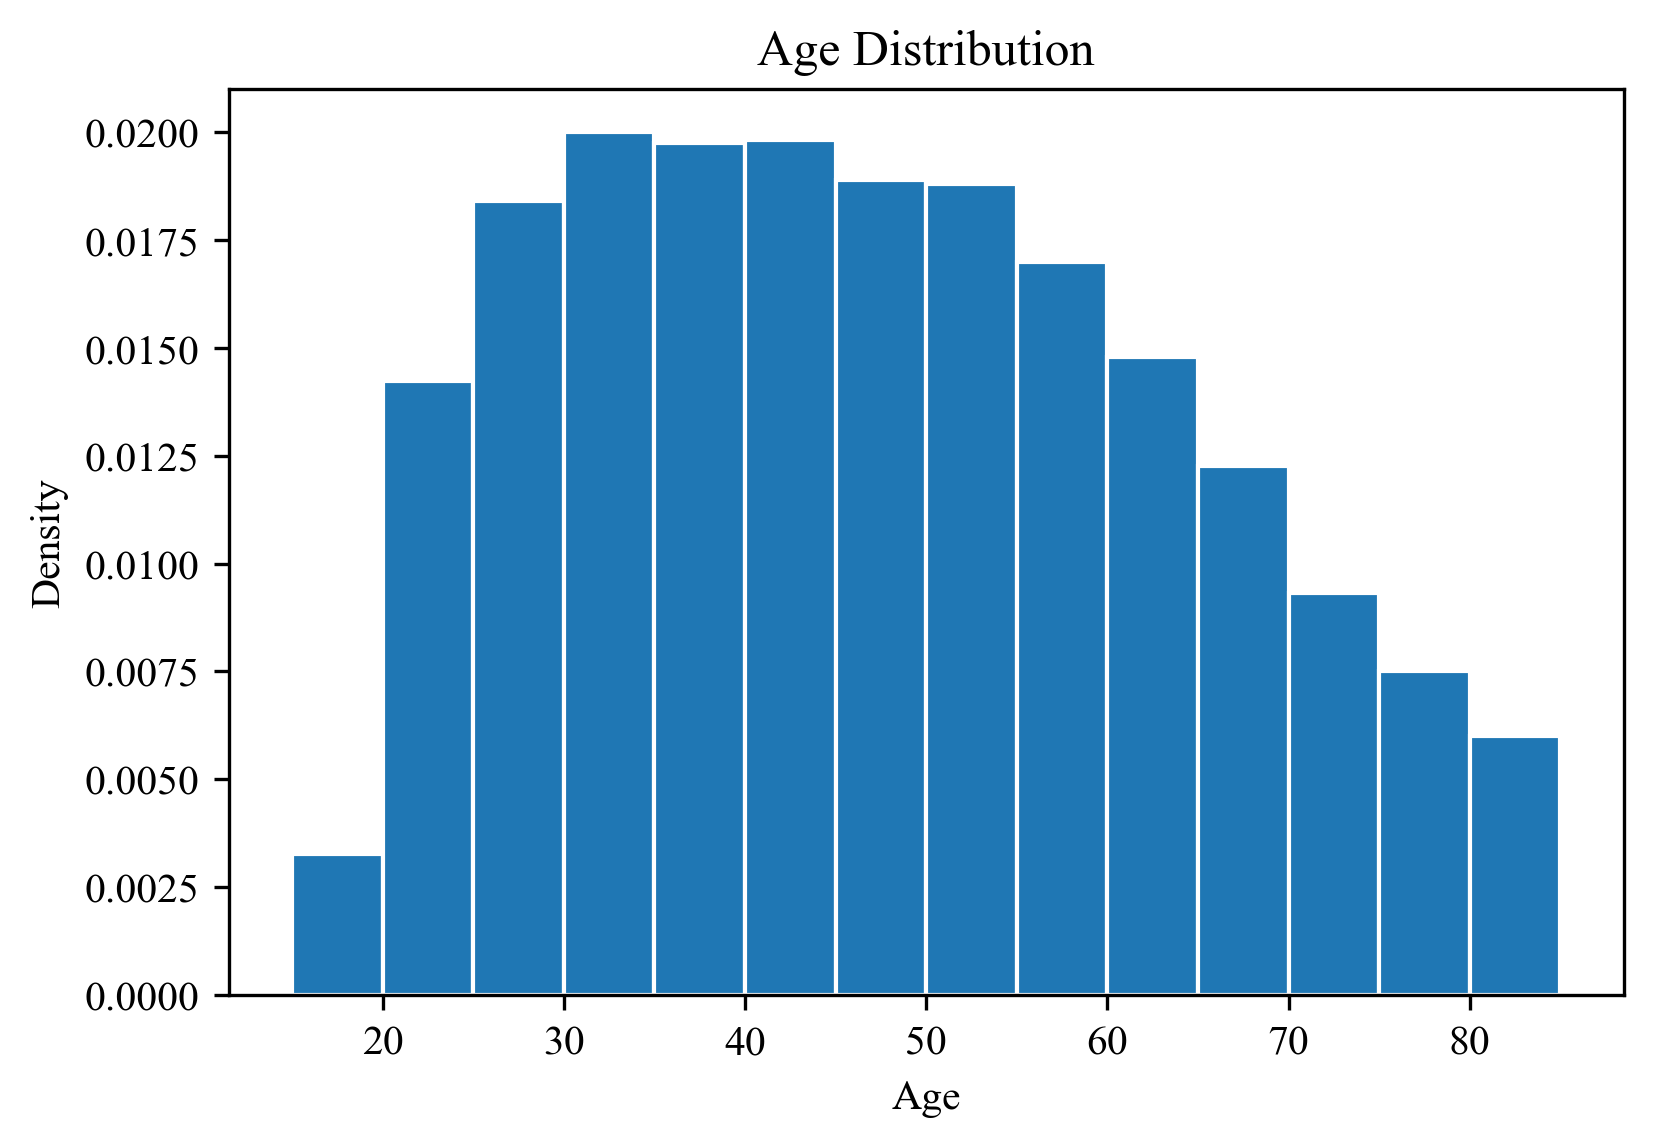

In [67]:
b = np.arange(15, 90, 5)
plt.figure(dpi=300)
plt.hist(age, density = True, ec = "w", bins = b)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density");